In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 14,8

import warnings
warnings.filterwarnings('ignore')

## Train/test split

In [2]:
(X_train,_), (X_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

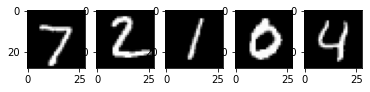

In [6]:
count = 5
plt.figure()

for i in range(count):
  ax = plt.subplot(2, count, i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()

plt.show()

## Model

In [7]:
from keras.models import Model
from keras.layers import Input, Dense

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_train.shape

(60000, 784)

## AE architecture

In [8]:
input_layer = Input(shape=(784,))

encoding = Dense(256, 
                activation='relu')(input_layer)
encoding = Dense(128, 
                activation='relu')(encoding) 

code = Dense(32,
             activation='relu')(encoding)

decoding = Dense(128, 
                activation='relu')(code)

decoding = Dense(256, 
                activation='relu')(decoding)

output = Dense(784,
               activation='sigmoid')(decoding)

ae = Model(inputs=input_layer, outputs=[output])

In [9]:
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

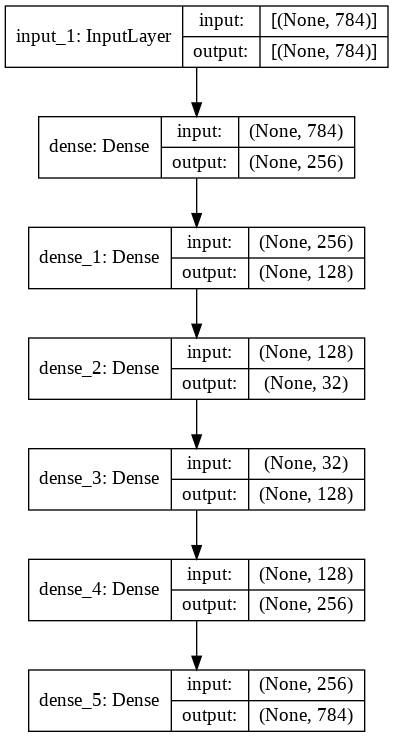

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(ae,
           to_file='model_plot_ae.png',
           show_shapes=True,
           show_layer_names=True)

In [11]:
encoder = Model(inputs=input_layer, outputs=[code])

In [12]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


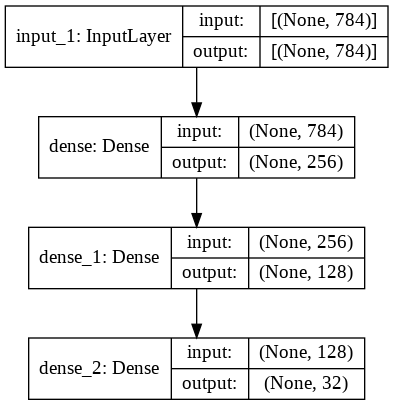

In [13]:
plot_model(encoder,
           to_file='model_plot_encoder.png',
           show_shapes=True,
           show_layer_names=True)

In [14]:
encoded_input = Input(shape=(32,))

decoded_layer = ae.layers[-3](encoded_input)
decoded_layer = ae.layers[-2](decoded_layer)

decoded = ae.layers[-1](decoded_layer)

decoder = Model(inputs=[encoded_input], outputs=[decoded])

In [15]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


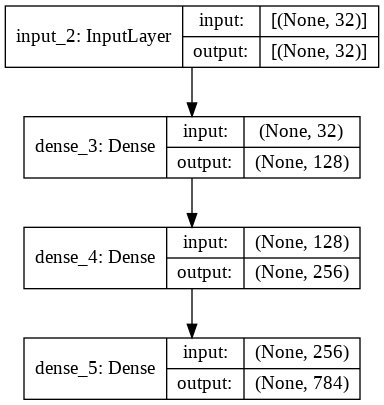

In [16]:
plot_model(decoder,
           to_file='model_plot_decoder.png',
           show_shapes=True,
           show_layer_names=True)

In [17]:
ae.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
ae.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test)
)

In [19]:
encoded = encoder.predict(X_test)
decoded = decoder.predict(encoded)

In [20]:
predicted_images = ae.predict(X_test)

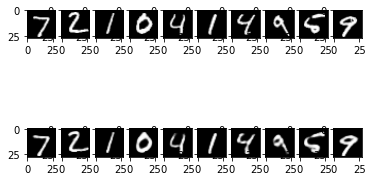

In [21]:
n = 10 
plt.figure()
for i in range(n):
    #print("\n Original Images \n")
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()

    # Display reconstruction
    #print("\n Autoencoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28,28))
    plt.gray()
    
plt.show()

The upper row is the original images and the lower row is the images created from the encodings by the decoder

Now, the images are of dimensions 28x28, and we have created encodings of dimensions of 32. if we represent the encodings as 16x2, it will look something like this

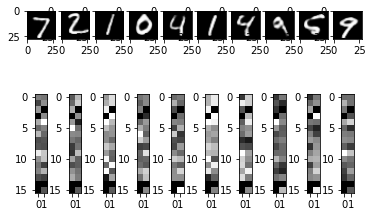

In [22]:
n = 10 
plt.figure()
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    
    #print("\n Encoded Images \n")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded[i].reshape(16,2))
    plt.gray()
    
plt.show()

The lower row represents the corresponding encodings